# Convolutional Neural Networks Explained

This notebook contains all of the code from the CNNs Explained article.

## Imports

In [38]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import numpy as np
%matplotlib inline

## Load an Image

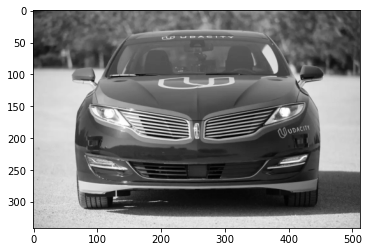

In [39]:
image_path = 'Images/car.png'
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
small_image = cv2.resize(gray_image, (0,0), fx=0.5, fy=0.5)
normalize_image = small_image.astype("float32")/255

plt.imshow(normalize_image, cmap='gray')
plt.show()

## Apply Convolutional Layer

Text(0.5, 1.0, 'Image after convolution')

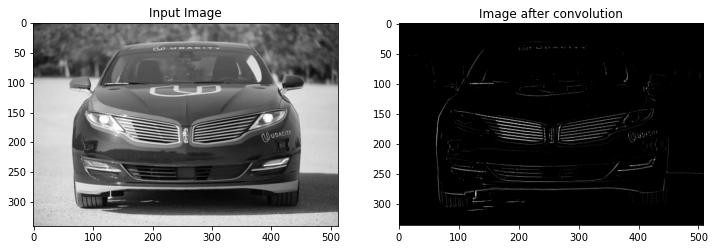

In [40]:
input_shape = normalize_image.shape

model = Sequential()
model.add(Convolution2D(1, (5, 5), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))

image_resize = np.reshape(normalize_image, (1, input_shape[0], input_shape[1], 1))
predicted_image = model.predict(image_resize)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(normalize_image, cmap='gray')
plt.title("Input Image")
plt.subplot(1,2,2)
plt.imshow(np.squeeze(predicted_image)*100, cmap='gray')
plt.title("Image after convolution")

## Apply Pooling Layer

Text(0.5, 1.0, 'Image after pooling')

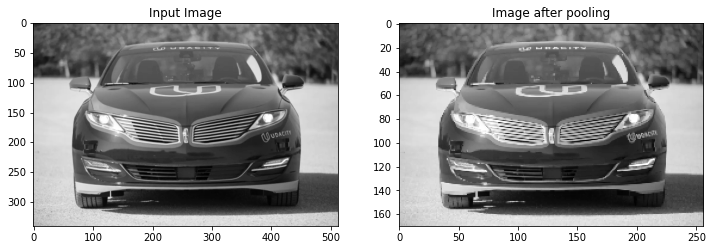

In [41]:
input_shape = normalize_image.shape

model = Sequential()
model.add(MaxPooling2D(2, input_shape=(input_shape[0], input_shape[1], 1)))

image_resize = np.reshape(normalize_image, (1, input_shape[0], input_shape[1], 1))
predicted_image = model.predict(image_resize)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(normalize_image, cmap='gray')
plt.title("Input Image")
plt.subplot(1,2,2)
plt.imshow(np.squeeze(predicted_image)*100, cmap='gray')
plt.title("Image after pooling")

## CNN Example Task

In [49]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [43]:
 # normalize image
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [44]:
# CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# load and prepare the image, same as done with dataset above
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [53]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories, model

In [54]:
# run the test harness for evaluating a model
def run_task():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories, model = evaluate_model(trainX, trainY)
    # summarize estimated performance
    print('Accuracy: mean=%.3f' % (mean(scores)*100, std(scores)*100, len(scores)))
    
    # test the model on an unseen image from files
    img = load_image('Images/test_image.png')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

run_task()

> 98.867
> 99.000
> 98.833
> 98.967
> 98.925
Accuracy: mean=98.918 std=0.062, n=5
7
